In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation

In [2]:
sigma = 10
rho = 28
beta = 8 / 3
def f(xx,t):
    global sigma  , rho , beta
    xi , yi , zi = xx
    dx = sigma *(yi - xi)
    dy = xi * (rho - zi) -yi
    dz = xi * yi - beta * zi
    
    return dx,dy,dz
T = np.linspace(0,100,5000)
xi = np.zeros(3) + 0.1
G = odeint(f,xi,T)

X, Y, Z = G.T

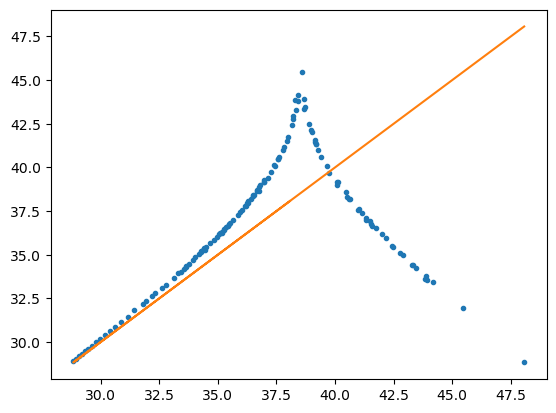

In [3]:
%matplotlib inline
H = Z.copy()
maxz = []
for i in range(1,len(H)-1):
    if H[i-1] < H[i] > H[i+1]:
        maxz.append(H[i])
#plt.subplot_adjust(0.01,0.01,0.99,0.99)
plt.plot(maxz[:-1],maxz[1:],'.')
plt.plot(maxz,maxz)
plt.show()

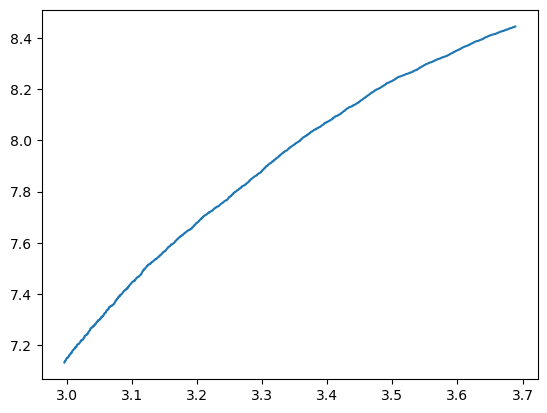

In [4]:
H = G.copy()
r = np.linspace(20,40,5000)
z1 = np.ones([100,5000])
ave = []
for i in range(100):
    n1 = 0.01#np.random.uniform(-15,20)
    n2 = 0.01#np.random.uniform(-20,30)
    n3 = 0.01#np.random.uniform(0,50)
    
    x1 = np.array([[n1, n2, n3]])
    x1 = np.repeat(x1 , 5000, axis=0)
    
    dist = norm(H - x1, axis=1)
    
    for j, d in enumerate(r):
        z1[i, j] = len(dist[dist < d])
z1 = np.mean(z1 , axis = 0)
M1, M2 = np.log(r), np.log(z1)
plt.plot(M1,M2)
plt.show()

array([2.06335792, 1.06262958])

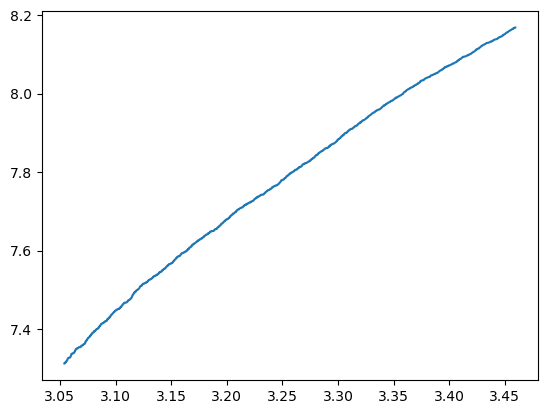

In [5]:
plt.plot(M1[300:-2050],M2[300:-2050] ) 
def slope(x,m,c):
    return m*x+c
p,s = curve_fit(slope,M1[300:-2050],M2[300:-2050] )
p

In [6]:
%matplotlib qt

fig= plt.figure()
ax = fig.add_subplot(projection = '3d')
plt.subplots_adjust(0.01,0.01,0.99,0.99)

def anim(frames):
    ax.cla()
    ax.set_xlim([-15,20])
    ax.set_ylim([-20,30])
    ax.set_zlim([0,45])
    ax.plot(X[:frames], Y[:frames], Z[:frames])
aaa= FuncAnimation(fig, anim, frames=5000, interval = 30, repeat=False)

MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
failed to load driver: iris
MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
